<a href="https://colab.research.google.com/github/rithishkrishnaskct/Project/blob/main/Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv("/content/heart.csv")
df.head();

In [9]:
import numpy as np
import pandas as pd
import keras as k
from keras.layers import Dense
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.utils import shuffle
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import Sequential

In [3]:
data = df.drop_duplicates()
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
data.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [6]:
df.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


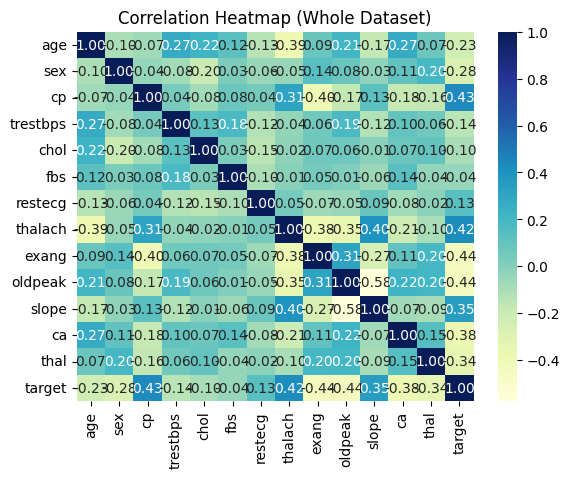

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Heatmap (Whole Dataset)")
plt.show()


In [13]:
X = df[['cp', 'thalach', 'exang', 'oldpeak']]  # input features
Y = df['target']                              # label to predict


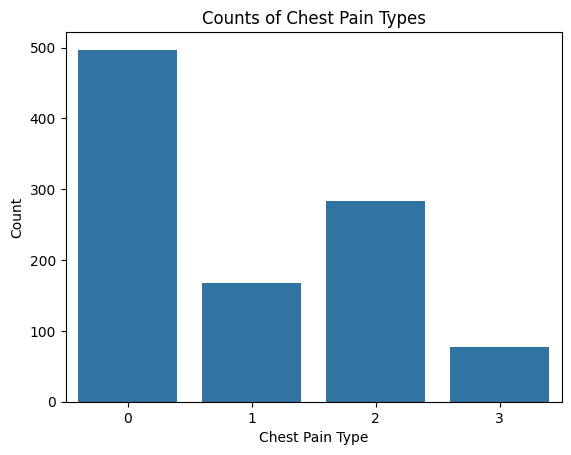

In [28]:
import seaborn as sns

# Count plot for 'cp' (chest pain type)
sns.countplot(x='cp', data=df)
plt.title("Counts of Chest Pain Types")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.show()


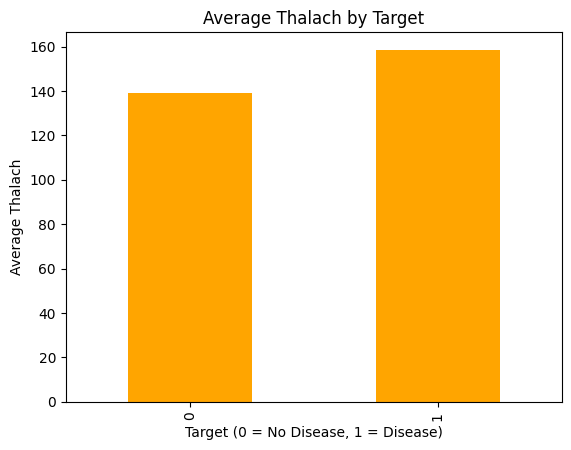

In [29]:
# Average 'thalach' value for each class of target
df.groupby('target')['thalach'].mean().plot(kind='bar', color='orange')
plt.title("Average Thalach by Target")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Average Thalach")
plt.show()


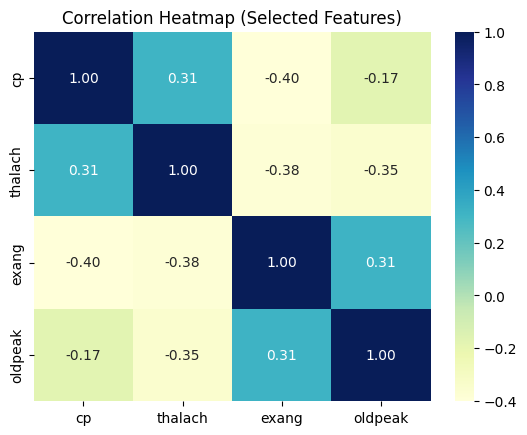

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df[X.columns].corr()

sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Heatmap (Selected Features)")
plt.show()


In [14]:
from sklearn.model_selection import train_test_split,cross_validate

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train, X_test, Y_train, Y_test are already defined

# Create and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:")
print(report)


Accuracy: 0.96
Precision: 0.94
Recall: 0.98
F1 Score: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       105
           1       0.94      0.98      0.96       100

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



Confusion Matrix:
[[99  6]
 [ 2 98]]


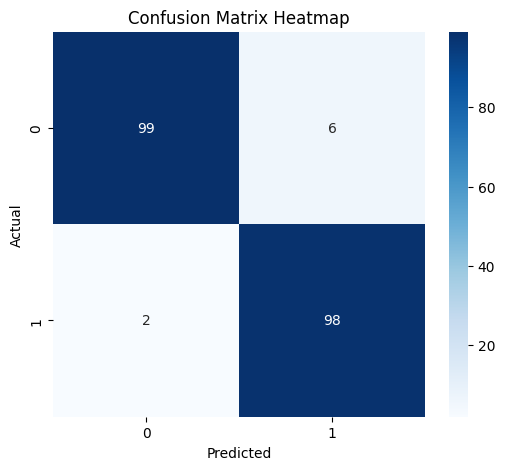

In [25]:

# Print confusion matrix as text
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


Decision Tree Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       105
           1       0.94      0.97      0.96       100

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205

Confusion Matrix:
[[99  6]
 [ 3 97]]


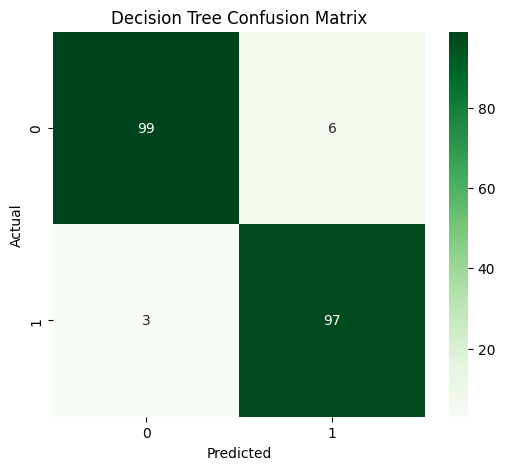

In [27]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train, X_test, Y_train, Y_test are already defined

# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, Y_train)

# Make predictions
Y_pred_dt = dt_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(Y_test, Y_pred_dt)
report = classification_report(Y_test, Y_pred_dt)
cm = confusion_matrix(Y_test, Y_pred_dt)

print(f"Decision Tree Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(report)

print("Confusion Matrix:")
print(cm)

# Plot confusion matrix heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()